# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Name and ID:  Sai Rohith Pasala; 1001873156  <-------------------- Only this student will submit the assignment

Student Name and ID:  Sri Naga Venkata Pavan Kalyan Sirigibattula; 1001886149

Student Name and ID:  Rutvik Naga Sai Dondapati; 1001879177


## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is not required for this assignment. If you want to document a function or a process, just comment or use markup cell.
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 3 files . 




You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
} 

<IPython.core.display.Javascript object>

## Required Python Packages 

In [5]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only
!pip install plotly

import numpy as np
#importing Operations required for Data analysis, wrangling and common exploratory
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import seaborn as sns
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import plotly.graph_objects as go

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [6]:
#########################begin code for Task 1-a
# Data pre-processing.
#importing the dataset csv file to dataframe
    
cluster_df = pd.read_csv('CC GENERAL.csv', skipinitialspace=True, encoding='latin1')

#printing the dataset
cluster_df.sample(8)
#########################begin code for Task 1-a


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2763,C12842,1388.825312,1.000000,974.42,901.92,72.50,1563.646228,1.000000,1.000000,0.400000,0.600000,25,33,1500.0,1071.874614,757.902835,0.000000,10
3249,C13343,25.095678,0.888889,177.76,0.00,177.76,0.000000,0.888889,0.000000,0.777778,0.000000,0,8,1500.0,138.239594,130.345404,0.285714,9
6359,C16534,1093.027318,1.000000,0.00,0.00,0.00,92.017750,0.000000,0.000000,0.000000,0.083333,1,0,1200.0,330.592103,227.755597,0.000000,12
6630,C16813,8.111284,0.545455,122.58,0.00,122.58,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,3400.0,206.903715,166.887922,0.800000,12
3913,C14023,113.629276,0.272727,798.00,798.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,5000.0,4372.014696,84.491283,0.000000,12
7056,C17248,1752.637427,1.000000,0.00,0.00,0.00,1770.461427,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,859.631936,396.466646,0.000000,12
8012,C18229,2162.267501,1.000000,151.13,151.13,0.00,1005.558530,0.166667,0.166667,0.000000,0.166667,3,3,2500.0,466.376831,619.460541,0.000000,12
1026,C11061,1076.571029,1.000000,45.65,45.65,0.00,48.730842,0.083333,0.083333,0.000000,0.083333,1,1,1200.0,299.789950,374.377774,0.000000,12


In [19]:
#clearing out null values in the dataset
cluster_df = cluster_df.dropna()

In [8]:
#creating a new column called bin saving it based on TENURE column
cluster_df["bin"] = cluster_df["TENURE"] * 1.882

for i in range(0,len(cluster_df)):
    if cluster_df["TENURE"].iloc[i]>10:
        cluster_df["bin"].iloc[i]=1
    else:
        cluster_df["bin"].iloc[i]=0

# data preprocessing is done

C:\Users\harsh\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
#dropping the CUSt_ID as it unique for each row and useless
cluster_df=cluster_df.drop(['CUST_ID'], axis=1)

In [10]:
#clearing out missing values in the dataset
nullValues = cluster_df.isnull().sum()
print(nullValues)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
bin                                 0
dtype: int64


In [11]:
#From observing the dataset , there are Null values only in two columns so we fill them out
cluster_df['MINIMUM_PAYMENTS'].fillna((cluster_df['MINIMUM_PAYMENTS'].mean()), inplace=True)
cluster_df['CREDIT_LIMIT'].fillna((cluster_df['CREDIT_LIMIT'].mean()), inplace=True)
#printing out to ascertain we have no null
nullValues = cluster_df.isnull().sum()
print(nullValues)
#preprocesing complete

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
bin                                 0
dtype: int64


In [12]:
#Sample data to print first 5 rows
print(cluster_df.head(5))

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [13]:
#Exclude the Cust_id column
cluster_df=cluster_df.iloc[:,1:]
cluster_df.head()
target=cluster_df["TENURE"]

Plotting your Data...
-----------------------------------------------------------------------


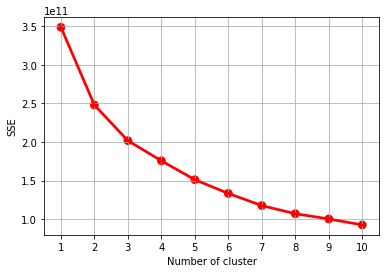

In [14]:
#########################begin code for Task 1-a
print("Plotting your Data...")
print("-----------------------------------------------------------------------")
Sum_Sq_Err = [] # creating a list to store squared errors
sse = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k).fit(cluster_df)#iterating l(k-value) against S.S.E for 
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()

sns.pointplot(x=list(sse.keys()), y=list(sse.values()),color="Red") 

plt.xlabel("Number of cluster")

plt.ylabel("SSE")
plt.grid(True)


plt.show()

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [15]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing

### Important!!!

target=cluster_df['bin']#bin is target variable
dataset_reamining=cluster_df.drop('bin',axis=1)

X_train,X_test = train_test_split(cluster_df, test_size=0.30, random_state=100)

target_X_train=X_train['bin'].astype(int)
target_X_test=X_test['bin'].astype(int)


####target_X_train=###############end code for Task 1-b-1

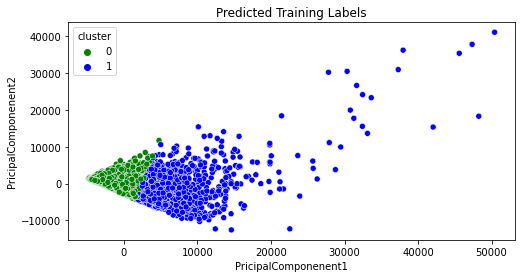

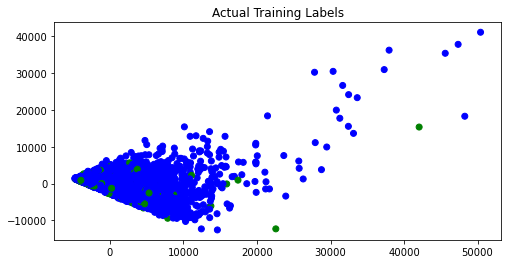

In [16]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA

import matplotlib.patches as mpatches
# Create the KMeans model
X_train_ = X_train;               
Y_train_ = X_train.iloc[:, 15];
kmeans = KMeans(2) #since clusters are 4

# Compute cluster centers and predict cluster index for each sample 
kmeans_train=kmeans.fit(X_train_)
labels = kmeans.labels_ 

# Model and fit the data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(X_train_)

x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
# Visualize the predicted labels.
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(X_train_)
pca_data = pd.DataFrame(data = pca_comp, columns = ['PricipalComponenent1', 'PricipalComponenent2'])
pca_data.head()
pca_data = pd.concat([pca_data, pd.DataFrame({'cluster': labels})], axis = 1)
pca_data.head()
plt.figure(figsize=(8,4))

ax= sns.scatterplot(x='PricipalComponenent1', y='PricipalComponenent2', hue = 'cluster', data=pca_data, palette=['green', 'blue',])
ax.set_title('Predicted Training Labels')

colormap = np.array(['green','blue'])


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.scatter(x, y, c=colormap[target_X_train])
ax.set_title('Actual Training Labels')
plt.show()

    


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

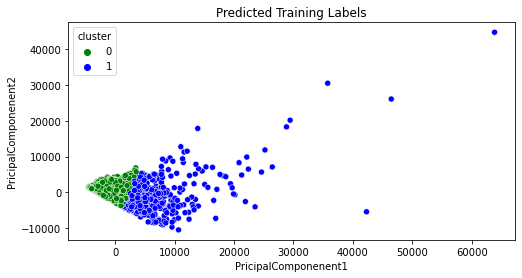

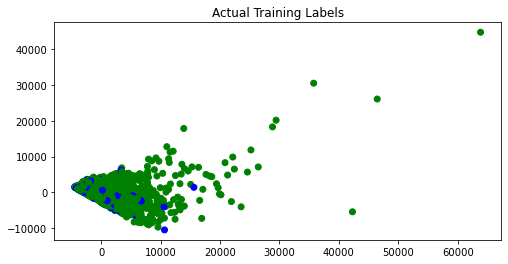

In [17]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels



# Import PCA
from sklearn.decomposition import PCA

import matplotlib.patches as mpatches
# Create the KMeans model
X_test_ = X_test;               
Y_test_ = X_test.iloc[:, 16];
kmeans = KMeans(2) 

# Compute cluster centers and predict cluster index for each sample 
kmeans_test=kmeans.fit(X_test_)
labels = kmeans.labels_ 

# Model and fit the data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(X_test_ )

x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
# Visualize the predicted labels.
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(X_test_)
pca_data = pd.DataFrame(data = pca_comp, columns = ['PricipalComponenent1', 'PricipalComponenent2'])
pca_data.head()
pca_data = pd.concat([pca_data, pd.DataFrame({'cluster': labels})], axis = 1)
pca_data.head()
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x='PricipalComponenent1', y='PricipalComponenent2', hue = 'cluster', data=pca_data, palette=['green', 'blue',])
ax.set_title('Predicted Training Labels')

colormap = np.array(['blue','green'])


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.scatter(x, y, c=colormap[target_X_test])
ax.set_title('Actual Training Labels')
plt.show()

    

plt.show()
    




###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [18]:
###################begin code for Task 1-b-4: Print out a confusion matrix
from sklearn.metrics import confusion_matrix
#design of kmeans model
X_testing=X_test;
Y_testing=X_test.iloc[:,16];
kmeans=KMeans(2)
kmeans.fit(X_testing)
print("k-measn clustering Confusion matrix for k=2")
cindex=kmeans.predict(X_testing)
print(confusion_matrix(Y_testing,cindex))
###################end code for Task 1-b-4

k-measn clustering Confusion matrix for k=2
[[  34  253]
 [ 547 1757]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [33]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
X = X_train;               
Y = X_train.iloc[:, 16];
pdm_train = X

print("Hierarchical Agglomerative Clustering Model Initated...")
print("-----------------------------------------------------------------------")
cosine_distance = pairwise_distances(pdm_train,metric='cosine')#Using Cosine Similarity
euclidean_distance = pairwise_distances(pdm_train,metric='euclidean')#Using Euclidean Distance
manhattan_distance = pairwise_distances(pdm_train,metric='manhattan')#Using Manhattan Distance

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cos_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_distance)#complete linkage + cosine
cos_comp_f1 = f1_score(Y,cos_comp)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
euc_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)#complete linkage + euclidean
euc_comp_f1 = f1_score(Y,euc_comp)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan

man_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_distance)#complete linkage + manhattan
man_comp_f1 = f1_score(Y,man_comp)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
cos_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_distance)#average linkage + cosine
cos_avg_f1 = f1_score(Y,cos_avg)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
euc_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_distance)#average linkage + euclidean
euc_avg_f1 = f1_score(Y,euc_avg)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
man_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_distance)#average linkage + manhattan
man_avg_f1 = f1_score(Y,man_avg)

print("######F1-score for complete linkage + cosine######", cos_comp_f1) #complete linkage + cosine
print("-----------------------------------------------------------------------")
print("######F1-score for complete linkage + euclidean######", euc_comp_f1)#complete linkage + euclidean
print("-----------------------------------------------------------------------")
print("######F1-score for complete linkage + manhattan######", man_comp_f1)#complete linkage + manhattan
print("-----------------------------------------------------------------------")
print("######F1-score for average linkage + cosine######", cos_avg_f1)#average linkage + cosine
print("-----------------------------------------------------------------------")
print("######F1-score for average linkage + euclidean######", euc_avg_f1)#average linkage + euclidean
print("-----------------------------------------------------------------------")
print("######F1-score for average linkage + manhattan######", man_avg_f1)#average linkage + manhattan


###################end code for Task 2-a

Hierarchical Agglomerative Clustering Model Initated...
-----------------------------------------------------------------------
######F1-score for complete linkage + cosine###### 0.09833187006145741
-----------------------------------------------------------------------
######F1-score for complete linkage + euclidean###### 0.005910602142593276
-----------------------------------------------------------------------
######F1-score for complete linkage + manhattan###### 0.023064250411861612
-----------------------------------------------------------------------
######F1-score for average linkage + cosine###### 0.046242774566473986
-----------------------------------------------------------------------
######F1-score for average linkage + euclidean###### 0.005909510618651893
-----------------------------------------------------------------------
######F1-score for average linkage + manhattan###### 0.9420619639418869


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

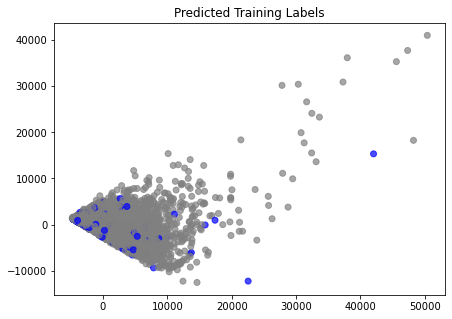

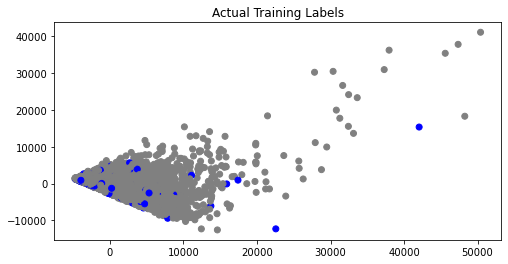

In [38]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
import matplotlib 
kmeans = KMeans(n_clusters=2)           
kmeans.fit(X)

#using PCA model used previously
    
# Computing cluster centers and then predicting cluster indexes for each sample 
cindex = kmeans.predict(X)  
# Visualize the predicted training labels versus actual training labels. 
X_train_pca = PCA(n_components=2).fit_transform( X)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
#using different colors for visualization
colors1 = ['blue','grey']         

plt.figure('Two Cluster K-Means best model visualization for training labels', figsize = (7,5))
plt.title('Predicted Training Labels')
plt.scatter(x,y, c=Y, alpha=0.7,label= Y, cmap=matplotlib.colors.ListedColormap(colors1))
ax.set_title('Predicted Training Labels')

colormap = np.array(['blue','grey'])


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.scatter(x, y, c=colormap[target_X_train])
ax.set_title('Actual Training Labels')
plt.show()

    

plt.show()
    


###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

[[    0.          9675.71915149  6612.93533536 ...   150.45289598
    546.69456321  1509.45919013]
 [ 9675.71915149     0.          7434.54705643 ...  9731.79540696
  10036.517596    9654.55891895]
 [ 6612.93533536  7434.54705643     0.         ...  6622.19164444
   7130.78553217  6365.06804617]
 ...
 [  150.45289598  9731.79540696  6622.19164444 ...     0.
    542.77547655  1474.17563232]
 [  546.69456321 10036.517596    7130.78553217 ...   542.77547655
      0.          1700.08208332]
 [ 1509.45919013  9654.55891895  6365.06804617 ...  1474.17563232
   1700.08208332     0.        ]]
0.055845998215485464


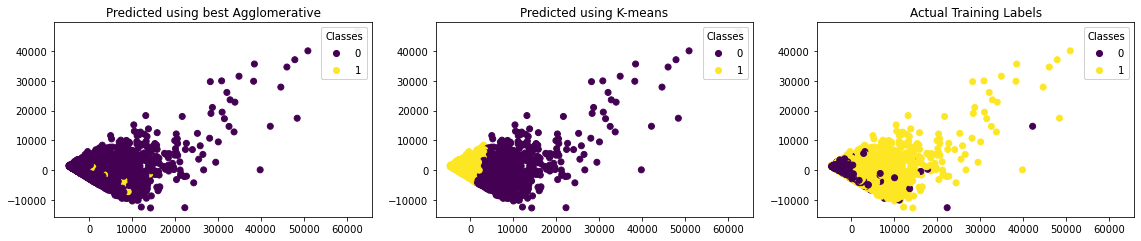

In [40]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
from sklearn.metrics import f1_score

# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)



clst=KMeans(init='k-means++',n_clusters=2,random_state=198)


cluster=clst.fit_predict(dataset_reamining)



### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pairwise_dist = pairwise_distances(dataset_reamining)
print(pairwise_dist)

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
manhattan_distance = pairwise_distances(dataset_reamining, metric='cosine')
alman = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average')
ypred_alman = alman.fit_predict(manhattan_distance)
f1_score_man = f1_score(target, ypred_alman, labels=None, pos_label=1, average='weighted', sample_weight=None)
print(f1_score_man)
### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = PCA(n_components=2).fit_transform(dataset_reamining)
x = X_pca[:, 0]
y = X_pca[:, 1]
fig, ax = plt.subplots(1, 3, figsize=(8, 4))
fig.subplots_adjust(top=0.8)
fig.subplots_adjust(right=2)

s=ax[0].scatter(x, y, c=ypred_alman)
ax[0].set_title('Predicted using best Agglomerative')
ax[1].scatter(x, y, c=cluster)
ax[1].set_title('Predicted using K-means')
ax[2].scatter(x, y, c=target)
ax[2].set_title('Actual Training Labels')

for a in ax.flat:
    legend1 = a.legend(*s.legend_elements(),
                    loc="upper right", title="Classes")
    a.add_artist(legend1)

plt.show()




# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 


###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [41]:
###################begin code for Task 3-b

print("Confusion Matrix for KMEANS Clustering: \n")
print(confusion_matrix(target,cluster))
print("Classification Report: \n",classification_report(target,cluster))


print("Confusion Matrix for Hierarchical Agglomerative Clustering : \n")
print(confusion_matrix(target,ypred_alman))
print("Classification Report: \n",classification_report(target,ypred_alman))
## Compare precision, recall, and F1-score for both model.
print("Comparing precision and recall for both the models there is huge variation but K-means downperfoms the Agglomerative \nclustering. The accuracy for K-means is 40% where as for Hierarchical it is 76%.The f1-score values for kmeans and hierarchical are 0.42 and 0.86 respectively")
## Which model is the best fit for our dataset. Explain in detail!
print("So the best model is Hierarchical Agglomerative Clustering ")
###################end code for Task 3-b

Confusion Matrix for KMEANS Clustering: 

[[ 116  818]
 [1810 5892]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.06      0.12      0.08       934
         1.0       0.88      0.76      0.82      7702

    accuracy                           0.70      8636
   macro avg       0.47      0.44      0.45      8636
weighted avg       0.79      0.70      0.74      8636

Confusion Matrix for Hierarchical Agglomerative Clustering : 

[[ 929    5]
 [7550  152]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.11      0.99      0.20       934
         1.0       0.97      0.02      0.04      7702

    accuracy                           0.13      8636
   macro avg       0.54      0.51      0.12      8636
weighted avg       0.88      0.13      0.06      8636

Comparing precision and recall for both the models there is huge variation but K-means downperfoms the Agglomerative 
clustering. The acc

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[45 points] Task 1:</b>  

    [15 points] Task 1-a: Determine “k” value from the elbow method

    [30 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a confusion matrix
    


<b>[50 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [15 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points